In [6]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use ('fivethirtyeight')


In [7]:
#Get the stock quote
today = str(datetime.today().year)+"-"+str(datetime.today().month)+"-"+str(datetime.today().day)
df = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01', end = today)
df



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610314
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678083
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818835
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952843
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932297
...,...,...,...,...,...,...
2021-10-07,144.220001,142.720001,143.059998,143.289993,61732700.0,143.289993
2021-10-08,144.179993,142.559998,144.029999,142.899994,58718700.0,142.899994
2021-10-11,144.809998,141.809998,142.270004,142.809998,64452200.0,142.809998


In [8]:
# Get the number of rows and columns in the data set
df.shape

(2462, 6)

Text(0.5, 0, 'Date')

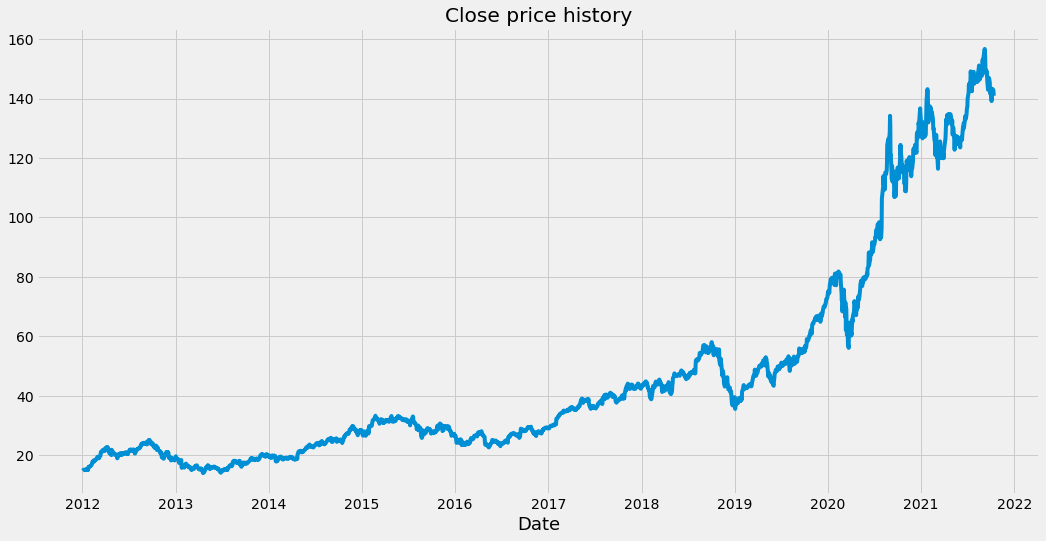

In [9]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
#plt.ylabel('Close Price USD ($)',18)

In [10]:
# Create a new dataframe with only the Close column

btc_close=df.filter(['Close'])

#Convert the dataframe to a numpy array

dataset = btc_close.values

# get the number of rows to train the model on

training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len


1970

In [11]:
#Scale the data

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.00517915],
       [0.00573209],
       [0.00688052],
       ...,
       [0.90276193],
       [0.8936546 ],
       [0.88945129]])

In [12]:
#create the training data set
#Create the scaled data set

train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range (100,len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i , 0])



In [13]:
#conver the c_train and y_train to numpy arrays


x_train,y_train = np.array(x_train), np.array(y_train)
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1870, 100, 1)

In [14]:
#Build the LSTM model
model = Sequential()

model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1 )))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [16]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1870/1870 [==============================] - 39s 20ms/step - loss: 2.3998e-04


In [17]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len - 100 : ,:]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (100,len(test_data)):
    x_test.append(test_data[i-100:i, 0])
    

In [18]:
#convert the data to numpy array 

x_test = np.array(x_test)
type(x_test)
x_test.shape


(492, 100)

In [19]:
#Reshape the Data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [20]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

predictions


array([[ 61.02144 ],
       [ 61.24393 ],
       [ 61.693176],
       [ 62.257416],
       [ 62.80755 ],
       [ 63.293312],
       [ 63.75786 ],
       [ 64.1802  ],
       [ 64.59601 ],
       [ 64.95432 ],
       [ 65.319565],
       [ 65.591576],
       [ 65.881165],
       [ 66.18637 ],
       [ 66.44112 ],
       [ 66.54914 ],
       [ 66.53639 ],
       [ 66.456764],
       [ 66.49036 ],
       [ 66.51327 ],
       [ 66.63744 ],
       [ 66.78002 ],
       [ 66.82393 ],
       [ 66.67234 ],
       [ 66.508865],
       [ 66.471306],
       [ 66.65549 ],
       [ 66.81642 ],
       [ 66.99772 ],
       [ 67.23708 ],
       [ 67.49909 ],
       [ 67.8549  ],
       [ 68.35954 ],
       [ 68.898476],
       [ 69.37483 ],
       [ 69.77492 ],
       [ 70.07331 ],
       [ 70.42497 ],
       [ 70.769844],
       [ 71.24458 ],
       [ 71.72595 ],
       [ 72.210144],
       [ 72.705414],
       [ 73.35377 ],
       [ 73.9144  ],
       [ 74.442764],
       [ 74.85044 ],
       [ 75.2

In [21]:
#Get root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.998947042759841

C:\Users\JUANDI~1\AppData\Local\Temp/ipykernel_17368/2963163159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


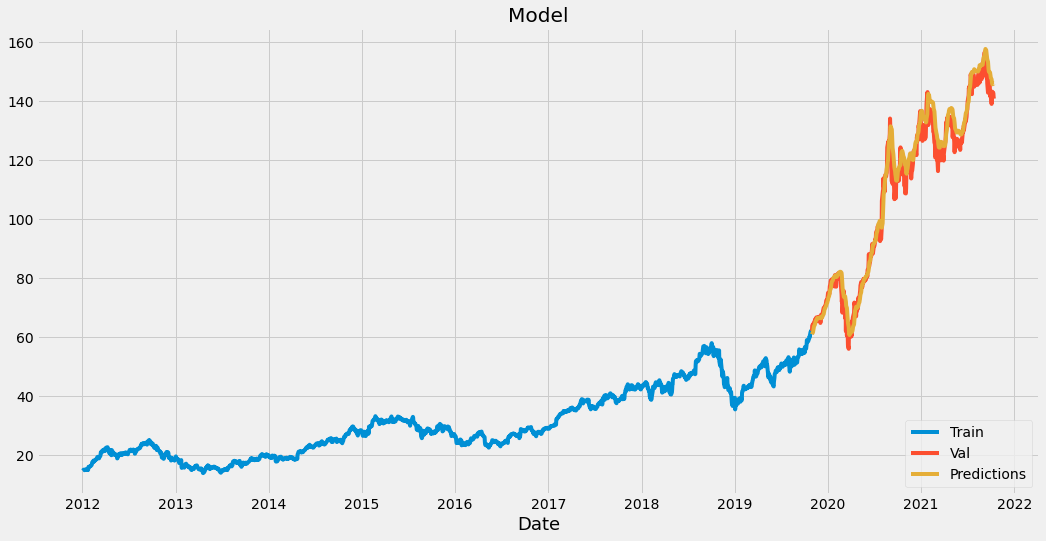

In [22]:
#Plot the data
train = btc_close[:training_data_len]
valid = btc_close[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel=('Close Price USD ($)',18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [23]:
#Show the valid and preficted prices
valid

,Close,Predictions
Date,,
2019-10-31,62.189999,61.021439
2019-11-01,63.955002,61.243931
2019-11-04,64.375000,61.693176
2019-11-05,64.282501,62.257416
2019-11-06,64.309998,62.807549
...,...,...
2021-10-07,143.289993,145.808029
2021-10-08,142.899994,145.833588
2021-10-11,142.809998,145.959564


In [24]:
#Get the quote
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2021-12-31')
#create a new Dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array 
last_60_days = new_df[-100:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#create and empty list

X_test = []
#append the last 60days
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
type(X_test)

numpy.ndarray

In [25]:

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


#Get the predicted scaled price

pred_price = model.predict(X_test)

#undo the scaling
pred_price =scaler.inverse_transform(pred_price)
print(pred_price)

[[145.93951]]


In [26]:
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2021-10-7',end='2021-10-7')
print(apple_quote2['Close'])

Date
2021-10-07    143.289993
Name: Close, dtype: float64
